# Project : Predicting Heart Disease


## Problem Statement:

 You are the data scientist at a medical research facility. The facility wants you to
 build a machine learning model to classify if the given data of a patient should tell
 if the patient is at the risk of a heart attack

## Heart Disease Dataset:

 UCI Heart Disease Dataset
 (https://archive.ics.uci.edu/ml/datasets/Heart+Disease?spm=5176.100239.blogcont54260.8.TRNGoO)

## Lab Environment:

Jupyter Notebooks

## Domain:

Healthcare

## Tasks To Be Performed:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd .read_csv("C:\\Users\\athir\\Downloads\\dataset.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Display summary statistics
summary = df.describe()
print(summary)

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [5]:
# Calculate correlation matrix
correlation_matrix = df.corr()
# Display correlation matrix
print(correlation_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

a. Visualize the number of patients having a heart disease and not having a heart disease:

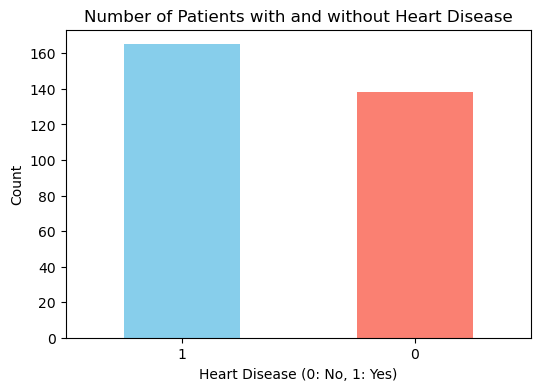

In [6]:
# Count the number of patients having and not having heart disease
heart_disease_counts = df['target'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
heart_disease_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Patients with and without Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


b. Visualize the age and whether a patient has disease or not:

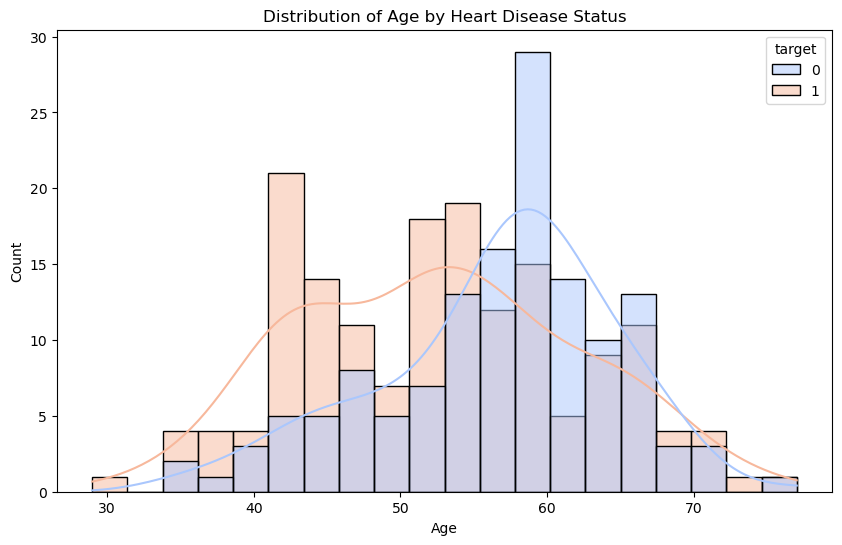

In [7]:
# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', bins=20, kde=True, palette='coolwarm')
plt.title('Distribution of Age by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


c. Visualize correlation between all features using a heat map:

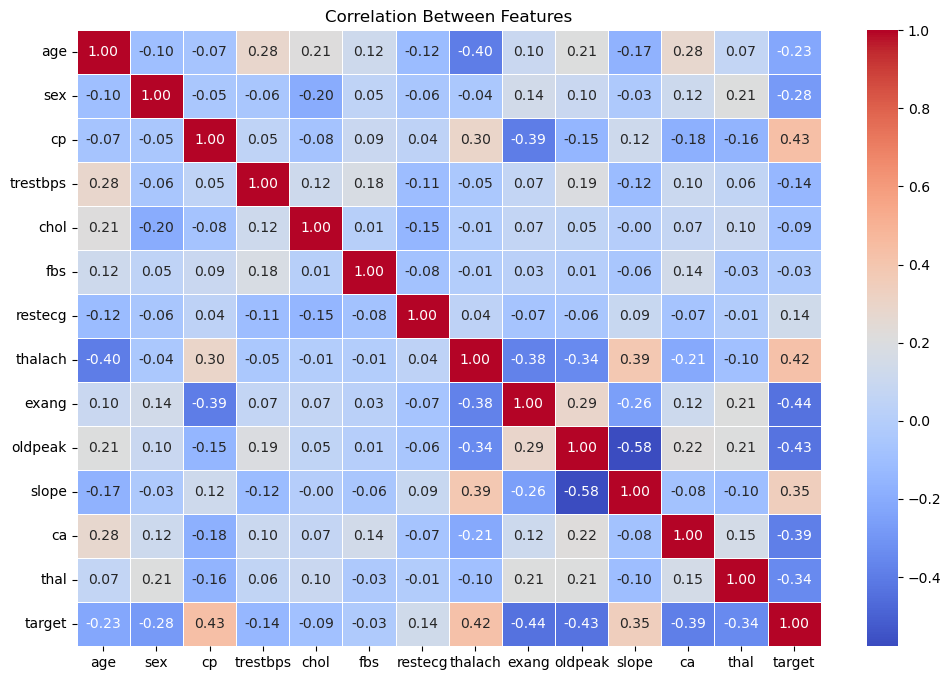

In [8]:
# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Features')
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
col_list=list(df.columns)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
x=df[col_list]

In [15]:
col=[]
for i in df.columns:
  if ((df[i].dtypes !='object') & (i!='target')):
    col.append(i)

x=df[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns)) ]
vif_data

,features,vif
0,age,38.998305
1,sex,3.523211
2,cp,2.414403
3,trestbps,58.557335
4,chol,26.267365
5,fbs,1.268205
6,restecg,2.058206
7,thalach,42.742178
8,exang,2.022527
9,oldpeak,3.062890


In [16]:
df=df.drop(['trestbps'],axis=1)

In [17]:
col=[]
for i in df.columns:
  if ((df[i].dtypes !='object') & (i!='target')):
    col.append(i)

x=df[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns)) ]
vif_data

,features,vif
0,age,28.599796
1,sex,3.522376
2,cp,2.403644
3,chol,25.923434
4,fbs,1.250256
5,restecg,2.058206
6,thalach,34.026519
7,exang,1.990878
8,oldpeak,2.973430
9,slope,10.067190


In [18]:
df=df.drop(['thalach'],axis=1)

In [19]:
col=[]
for i in df.columns:
  if ((df[i].dtypes !='object') & (i!='target')):
    col.append(i)

x=df[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns)) ]
vif_data

,features,vif
0,age,27.213596
1,sex,3.412645
2,cp,2.264790
3,chol,22.374105
4,fbs,1.248307
5,restecg,2.022210
6,exang,1.955987
7,oldpeak,2.965697
8,slope,8.372679
9,ca,1.760648


In [20]:
df=df.drop(['age'],axis=1)

In [21]:
col=[]
for i in df.columns:
  if ((df[i].dtypes !='object') & (i!='target')):
    col.append(i)

x=df[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns)) ]
vif_data

,features,vif
0,sex,3.404301
1,cp,2.211674
2,chol,14.917083
3,fbs,1.232428
4,restecg,2.006017
5,exang,1.947640
6,oldpeak,2.827322
7,slope,7.983150
8,ca,1.710828
9,thal,14.860553


In [22]:
df=df.drop(['chol'],axis=1)

In [23]:
col=[]
for i in df.columns:
  if ((df[i].dtypes !='object') & (i!='target')):
    col.append(i)

x=df[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns)) ]
vif_data

,features,vif
0,sex,3.348022
1,cp,2.154649
2,fbs,1.223893
3,restecg,2.005247
4,exang,1.915642
5,oldpeak,2.628953
6,slope,6.201591
7,ca,1.707658
8,thal,10.478889


In [24]:
df=df.drop(['thal'],axis=1)

In [25]:
col=[]
for i in df.columns:
  if ((df[i].dtypes !='object') & (i!='target')):
    col.append(i)

x=df[col]
vif_data=pd.DataFrame()
vif_data['features']=x.columns
vif_data['vif']=[variance_inflation_factor(x.values,j) for j in range(len(x.columns)) ]
vif_data

,features,vif
0,sex,3.038525
1,cp,2.112149
2,fbs,1.222870
3,restecg,1.957971
4,exang,1.795800
5,oldpeak,2.062440
6,slope,3.756703
7,ca,1.686170


In [26]:
vif_data.features

0        sex
1         cp
2        fbs
3    restecg
4      exang
5    oldpeak
6      slope
7         ca
Name: features, dtype: object

In [27]:
ind_features=list(vif_data.features)

In [28]:
ind_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca']

In [29]:
df_ind=df[ind_features]

In [30]:
df_ind

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca
0,1,3,1,0,0,2.3,0,0
1,1,2,0,1,0,3.5,0,0
2,0,1,0,0,0,1.4,2,0
3,1,1,0,1,0,0.8,2,0
4,0,0,0,1,1,0.6,2,0
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0
299,1,3,0,1,0,1.2,1,0
300,1,0,1,1,0,3.4,1,2
301,1,0,0,1,1,1.2,1,1


In [31]:
df_dep=df['target']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(df_ind,df_dep,test_size=0.30, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr=LogisticRegression()

In [36]:
lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred=lr.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [39]:
accuracy_score(y_test,y_pred)

0.8131868131868132

In [40]:
confusion_matrix(y_test,y_pred)

array([[34,  7],
       [10, 40]], dtype=int64)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.85      0.80      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [42]:
# Split the dataset into training and testing sets (70:30 ratio)
x_train, x_test, y_train, y_test = train_test_split(df_ind, df_dep, test_size=0.3, random_state=42)

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Build the decision tree model
tree_model = DecisionTreeClassifier()

# Train the model on the training set
tree_model.fit(x_train, y_train)

# Predict the target variable on the test set
y_pred = tree_model.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
[[33  8]
 [14 36]]
Accuracy: 0.7582417582417582


In [52]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data = export_graphviz(tree_model, out_file=None, 
                           feature_names=x.columns,  
                           class_names=['0', '1'],  
                           filled=True, rounded=True,  
                           special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("heart_disease_decision_tree", format='png', cleanup=True)  # Save the tree as a PNG file
graph.view()  # Display the tree in the default viewer


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# Split the dataset into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(df_ind, df_dep, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build the Random Forest model
rf_model = RandomForestClassifier()

# Train the model on the training set
rf_model.fit(x_train, y_train)

# Predict the target variable on the test set
y_pred = rf_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
# Extract a single decision tree from the Random Forest
tree = rf_model.estimators_[0]

# Export the decision tree to a dot file
dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=x.columns,  
                           class_names=['0', '1'],  
                           filled=True, rounded=True,  
                           special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("random_forest_decision_tree", format='png', cleanup=True)  # Save the tree as a PNG file
graph.view()  # Display the tree in the default viewer


In [ ]:
# Define a function to evaluate a classifier and print its confusion matrix
def print_confusion_matrix(classifier, x_train, y_train, x_test, y_test):
    # Train the classifier
    classifier.fit(x_train, y_train)
    
    # Predict the target variable on the test set
    y_pred = classifier.predict(x_test)
    
    # Print the confusion matrix
    print(f"\nConfusion Matrix for {classifier.__class__.__name__}:")
    print(confusion_matrix(y_test, y_pred))

# List of classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    # Add more classifiers as needed
}

# Split the dataset into features (X) and target variable (y)
df_ind = df[ind_features]
df_dep = df['target']
x_train, x_test, y_train, y_test = train_test_split(df_ind, df_dep, test_size=0.3, random_state=42)

# Print the confusion matrix for each classifier
for name, classifier in classifiers.items():
    print_confusion_matrix(classifier, x_train, y_train, x_test, y_test)


In [ ]:
# Define a function to evaluate a classifier and print its classification report
def print_classification_report(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(x_train, y_train)
    
    # Predict the target variable on the test set
    y_pred = classifier.predict(x_test)
    
    # Print the classification report
    print(f"\nClassification Report for {classifier.__class__.__name__}:")
    print(classification_report(y_test, y_pred))

# Print the classification report for each classifier
for name, classifier in classifiers.items():
    print_classification_report(classifier, x_train, y_train, x_test, y_test)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a function to evaluate a classifier and calculate Recall, Precision, and F1 score
def calculate_metrics(classifier, x_train, y_train, x_test, y_test):
    # Train the classifier
    classifier.fit(x_train, y_train)
    
    # Predict the target variable on the test set
    y_pred = classifier.predict(x_test)
    
    # Calculate Recall, Precision, and F1 score
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return recall, precision, f1

# Calculate Recall, Precision, and F1 score for each classifier
metrics = {}
for name, classifier in classifiers.items():
    recall, precision, f1 = calculate_metrics(classifier, x_train, y_train, x_test, y_test)
    metrics[name] = {'Recall': recall, 'Precision': precision, 'F1 Score': f1}

# Print the calculated metrics for all classifiers
print("Metrics for all classifiers:")
for name, metric in metrics.items():
    print(f"\n{name}:")
    for metric_name, value in metric.items():
        print(f"{metric_name}: {value:.2f}")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to evaluate a classifier and plot its confusion matrix as a heatmap
def plot_confusion_matrix(classifier, x_train, y_train, x_test, y_test):
    # Train the classifier
    classifier.fit(x_train, y_train)
    
    # Predict the target variable on the test set
    y_pred = classifier.predict(x_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {classifier.__class__.__name__}')
    plt.show()

# Plot the confusion matrix for each classifier
for name, classifier in classifiers.items():
    plot_confusion_matrix(classifier, x_train, y_train, x_test, y_test)


In [ ]:
# Dictionary to store accuracies of all classifiers
accuracies = {}

# Evaluate each classifier and store its accuracy
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(x_train, y_train)
    
    # Predict the target variable on the test set
    y_pred = classifier.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy in the accuracies dictionary
    accuracies[name] = accuracy

# Print the accuracies of all classifiers
print("Accuracies for all classifiers:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")

# Select the best model based on the highest accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

print(f"\nBest Model: {best_model_name} (Accuracy: {best_accuracy:.4f})")
